In [1]:
# ================================ Imports ================================ #
import matplotlib.pyplot as plt
import torch
import numpy as np
import logging
plt.style.use('seaborn-v0_8')

# =============================== Variables ================================== #
torch.manual_seed(100) # Do not change the seed
np.random.seed(100) # Do not change the seed
torch.set_default_dtype(torch.float64)
logging.basicConfig(filename="avg-error-pytorch.log", filemode='w', format='%(message)s')
logger = logging.getLogger()
logger.setLevel(logging.INFO)
EPOCH = 10000

In [2]:
class shallow_network(torch.nn.Module):

    def __init__(self,input_size,num_hidden_units,output_size) -> None:
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(input_size,num_hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(num_hidden_units,output_size),
            torch.nn.Sigmoid()
        )

    def forward(self,x):
        return self.model(x)





In [3]:
def plot_loss(train_loss):
    '''
    :param train_loss: list of training losses
    :return: saves a plot of the training losses vs epochs with file name loss-pytorch.png on current working directory
    '''
    # ========== Please do not edit this function

    plt.xlabel("Training Epoch")
    plt.ylabel("Training Loss")
    plt.plot(train_loss)
    plt.savefig("./loss-pytorch.png")

In [4]:

# ========= Input Data
X = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            X.append([i,j,k])
X = torch.tensor(X).double()
# ========= Ouput Labels
Y  = outputs = torch.all(X == 1, axis=1).double()

# =========== Write code to build neural net model
input_size = 3
num_hidden_units = 2
output_size = 1
model = shallow_network(input_size,num_hidden_units,output_size)


In [5]:
lr = 0.1
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

Epoch: 1 , Loss: 0.27910177762016286
Epoch: 2 , Loss: 0.2734991592922392
Epoch: 3 , Loss: 0.2681226517302833
Epoch: 4 , Loss: 0.2629643589687474
Epoch: 5 , Loss: 0.2580473999817464
Epoch: 6 , Loss: 0.25335075696895426
Epoch: 7 , Loss: 0.24884203766251325
Epoch: 8 , Loss: 0.24451387881179457
Epoch: 9 , Loss: 0.24032189194032477
Epoch: 10 , Loss: 0.23561860648572436
Epoch: 11 , Loss: 0.23111198896184254
Epoch: 12 , Loss: 0.22680706386960053
Epoch: 13 , Loss: 0.22303878847796765
Epoch: 14 , Loss: 0.2194128801057214
Epoch: 15 , Loss: 0.21592378647167826
Epoch: 16 , Loss: 0.21256608334732113
Epoch: 17 , Loss: 0.20936709047266794
Epoch: 18 , Loss: 0.20656495120428012
Epoch: 19 , Loss: 0.20385613163575492
Epoch: 20 , Loss: 0.20123748322457252
Epoch: 21 , Loss: 0.198705918638718
Epoch: 22 , Loss: 0.19625841751665773
Epoch: 23 , Loss: 0.19389203110613112
Epoch: 24 , Loss: 0.1916038859031493
Epoch: 25 , Loss: 0.1893911864043869
Epoch: 26 , Loss: 0.18725121707773204
Epoch: 27 , Loss: 0.1851813436

/tmp/ipykernel_36642/2138281888.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X).double()
/tmp/ipykernel_36642/2138281888.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y).double()


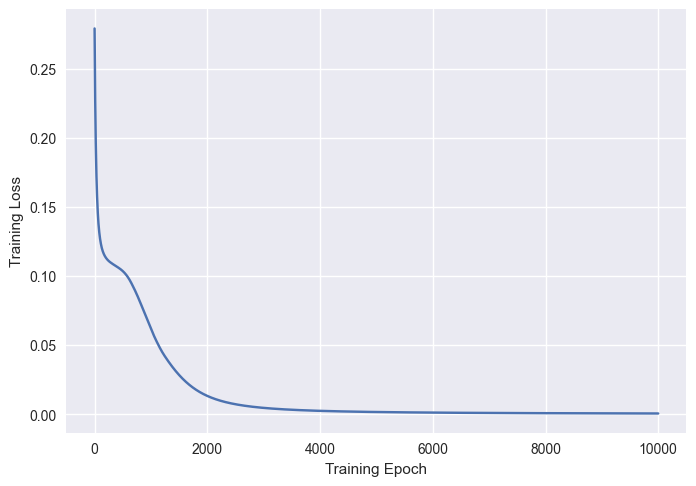

In [6]:

# =========== Write code for training the model
train_loss = [] # Use this list to store training loss per epoch
for i in range(EPOCH): # Total training epoch is 10000
    
    outputs = model(X)

    loss = loss_function(outputs.squeeze(1),Y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    print(f'Epoch: {i + 1} , Loss: {loss.item()}')

    
    train_loss.append(loss.item()) # Log the training loss for the epoch


# =========== Plot Epoch Losses
plot_loss(train_loss) # Do not change

# =========== Predict
X = torch.tensor(X).double()
Y = torch.tensor(Y).double()
error = []
logger.info("===================")
logger.info("   X       Y   Y' ")
logger.info("===================")
for i in range(Y.shape[0]):
    tstr = ""
    x = X[i]
    y_target = Y[i]
    y_pred = model.forward(x)
    loss = loss_function(y_pred.squeeze(),y_target)
    error.append(loss.item())
    x = x.data.numpy()
    y_target = int(y_target.item())
    y_pred = round(y_pred.item(), 1)
    tstr += str(x) + " "+ str(y_target)+" "+str(y_pred)
    logger.info(tstr)
logger.info("Average Error: " + str(round(np.mean(error), 5)))



In [7]:
Y.shape

torch.Size([8])

In [8]:
Y

tensor([0., 0., 0., 0., 0., 0., 0., 1.])